# PS1 Econ 248

**Problem 1.** The Rosen-Roback Model. Consider the Rosen-Roback model we saw in class. Choose $\alpha = 0.1$ and $\beta = 0.5$. Generate random produtivities and amenities for N regions by drawing them uniformly from the interval (0, 1). Set total population to $L = 1$.

(a) Solve for the equilibrium of the model. Graph population shares against amenities and against productivities.


_Solution_: The population (1) and wage distributions (2) fully characterizes the equilibrium
 
 (1)  $L_i = \frac{(\bar{A}_i \bar{U}_i)^{\frac{1}{\beta - \alpha}}}{\sum_i (\bar{A}_i \bar{U}_i)^{\frac{1}{\beta - \alpha}}} \cdot \bar{L} \Rightarrow \frac{L_i}{\bar{L}} \equiv \lambda_i = \frac{(\bar{A}_i \bar{U}_i)^{\frac{1}{\beta - \alpha}}}{\sum_i (\bar{A}_i \bar{U}_i)^{\frac{1}{\beta - \alpha}}}$

 (2)  $w_i = A_i$
 
 

In [41]:
import numpy as np
import pandas as pd

# Parameters
alpha = 0.1
beta = 0.5
N = 100  # Number of regions
L_total = 1.0  # Total population

# Generate random productivities and amenities
np.random.seed(0)  # For reproducibility
A_bar = np.random.uniform(0, 1, N)
U_bar = np.random.uniform(0, 1, N)

# Compute lambda_i using Equation (1)
exponent = 1 / (beta - alpha)
numerator = (A_bar * U_bar) ** exponent
denominator = np.sum(numerator)
lambda_i = numerator / denominator

# Compute L_i
L_i = lambda_i * L_total

# Compute wages using Equation (2)
w_i =  A_bar * L_i ** (alpha ) 

# Create a DataFrame to display results
df = pd.DataFrame({
    'Region': np.arange(1, N+1),
    'A_bar': A_bar,
    'U_bar': U_bar,
    'lambda': lambda_i,
    'L': L_i,
    'w': w_i,
})

# Display the DataFrame
print(df)



# Check if it's ok: W_i needs to be equalized across regions (its ok!)
U_i = U_bar *  L_i ** (- beta) 
W_i = w_i * U_i

# Create a DataFrame to display results
df_check = pd.DataFrame({
    'Region': np.arange(1, N+1),
    'A_bar': A_bar,
    'U_bar': U_bar,
    'lambda': lambda_i,
    'L': L_i,
    'w': w_i,
     'U': U_i,
    'W': W_i
})

# Display the DataFrame
print(df_check)





    Region     A_bar     U_bar        lambda             L         w
0        1  0.548814  0.677817  1.280087e-02  1.280087e-02  0.354935
1        2  0.715189  0.270008  2.485370e-03  2.485370e-03  0.392609
2        3  0.602763  0.735194  1.982755e-02  1.982755e-02  0.407262
3        4  0.544883  0.962189  3.018603e-02  3.018603e-02  0.383958
4        5  0.423655  0.248753  5.468255e-04  5.468255e-04  0.199893
..     ...       ...       ...           ...           ...       ...
95      96  0.183191  0.490459  3.669998e-04  3.669998e-04  0.083056
96      97  0.586513  0.227415  9.854553e-04  9.854553e-04  0.293522
97      98  0.020108  0.254356  2.837277e-07  2.837277e-07  0.004453
98      99  0.828940  0.058029  7.696982e-05  7.696982e-05  0.321481
99     100  0.004695  0.434417  2.850114e-08  2.850114e-08  0.000826

[100 rows x 6 columns]
    Region     A_bar     U_bar        lambda             L         w  \
0        1  0.548814  0.677817  1.280087e-02  1.280087e-02  0.354935   
1   

Graph population share against amenities (A_bar) and against productivities (U_bar)

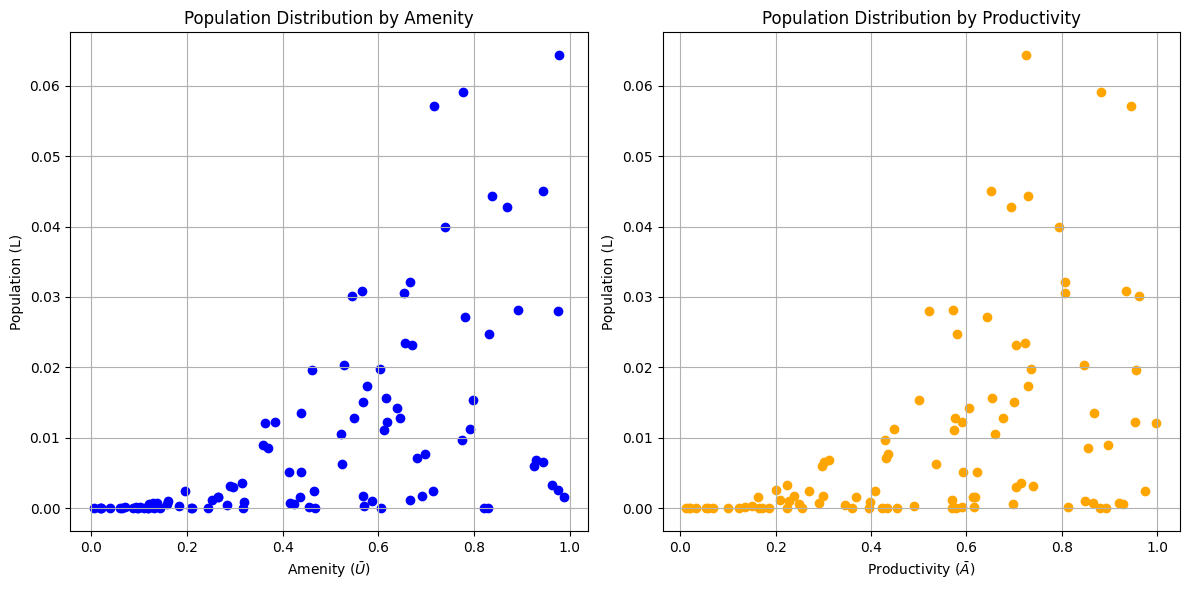

In [42]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['A_bar'], df['L'], color='blue', label='L')
plt.title('Population Distribution by Amenity')
plt.xlabel('Amenity ($\\bar{U}$)')
plt.ylabel('Population (L)')
plt.grid()
plt.subplot(1, 2, 2)
plt.scatter(df['U_bar'], df['L'], color='orange', label='L')
plt.title('Population Distribution by Productivity')
plt.xlabel('Productivity ($\\bar{A}$)')
plt.ylabel('Population (L)')
plt.grid()
plt.tight_layout()

(b) Redraw productivities and recompute equilibrium objects. Compute changes in wages and population in each location. Regress wage changes on changes in employment, do you recover your α? Is it biased up or down? Why? Explain.

In [43]:
# Generate new draws of random productivities
np.random.seed(6)  # For reproducibility
A_bar_b = np.random.uniform(0, 1, N)

# Compute lambda_i using Equation (1)
exponent = 1 / (beta - alpha)
numerator_b = (A_bar_b * U_bar) ** exponent
denominator_b = np.sum(numerator_b)
lambda_b = numerator_b / denominator_b

# Compute L_i
L_b = lambda_b * L_total

# Compute wages using Equation (2)
w_b = A_bar * L_b ** (alpha) 


# Create a DataFrame to display results
df_b = pd.DataFrame({
    'Region': np.arange(1, N+1),
    'A_bar': A_bar_b,
    'U_bar': U_bar,
    'lambda': lambda_b,
    'L': L_b,
    'w': w_b
})

# Display the DataFrame
print(df_b)

    Region     A_bar     U_bar    lambda         L         w
0        1  0.892860  0.677817  0.028096  0.028096  0.383963
1        2  0.331980  0.270008  0.000237  0.000237  0.310409
2        3  0.821229  0.735194  0.027930  0.027930  0.421458
3        4  0.041697  0.962189  0.000032  0.000032  0.193435
4        5  0.107657  0.248753  0.000012  0.000012  0.135943
..     ...       ...       ...       ...       ...       ...
95      96  0.315404  0.490459  0.000928  0.000928  0.091130
96      97  0.863030  0.227415  0.001683  0.001683  0.309656
97      98  0.558467  0.254356  0.000750  0.000750  0.009792
98      99  0.546708  0.058029  0.000018  0.000018  0.277501
99     100  0.367825  0.434417  0.001006  0.001006  0.002355

[100 rows x 6 columns]


In [44]:
df['log_wage'] = np.log(df['w'])
df['log_employment'] = np.log(df['L'])
df_b['log_wage'] = np.log(df_b['w'])
df_b['log_employment'] = np.log(df_b['L'])

df_diff = df - df_b
df_diff['Region'] = df['Region']

print(df_diff)

    Region     A_bar  U_bar    lambda         L         w  log_wage  \
0        1 -0.344047    0.0 -0.015295 -0.015295 -0.029028 -0.078612   
1        2  0.383210    0.0  0.002248  0.002248  0.082200  0.234924   
2        3 -0.218466    0.0 -0.008103 -0.008103 -0.014196 -0.034263   
3        4  0.503187    0.0  0.030154  0.030154  0.190524  0.685594   
4        5  0.315998    0.0  0.000535  0.000535  0.063950  0.385549   
..     ...       ...    ...       ...       ...       ...       ...   
95      96 -0.132212    0.0 -0.000561 -0.000561 -0.008074 -0.092774   
96      97 -0.276517    0.0 -0.000697 -0.000697 -0.016134 -0.053508   
97      98 -0.538359    0.0 -0.000750 -0.000750 -0.005339 -0.787969   
98      99  0.282232    0.0  0.000059  0.000059  0.043980  0.147114   
99     100 -0.363129    0.0 -0.001006 -0.001006 -0.001528 -1.047196   

    log_employment  
0        -0.786119  
1         2.349242  
2        -0.342634  
3         6.855937  
4         3.855489  
..             ...  


Regression:

In [45]:
import statsmodels.api as sm

# Define dependent and independent variables
X = df_diff['log_employment']
y = df_diff['log_wage']

# Add constant (intercept) to the model
X = sm.add_constant(X)

# Run the regression
model = sm.OLS(y, X).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.659e+31
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:03:38   Log-Likelihood:                 3419.0
No. Observations:                 100   AIC:                            -6834.
Df Residuals:                      98   BIC:                            -6829.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.082e-17   3.47e-17      0.

The procedure estimated $\hat{\alpha}=0.1= \alpha$ (no bias). 

I used to have bias (The reason is that both employment and wages endogenously reacted to the shift in $\bar{A_i}$. In order to recover $\alpha$ from a regression on log changes in wages to log changes in employment, we need a source of variation that only affects directly employment, and then wages through employment (therefore estimating the elasticity of employment on $A_i \implies w_i$), but not directly.

Under a new distribution of $\bar{A_i}$ but the same $\bar{U_i}$, there will be a new distribution of ${A_i}=w_i$, and ${L_i}$ that solves for the system of equations (1)-(2). Both variables adjusted endogenously. Then, we cannot recover the partial elasticity of employment on productivity (=wages), what we observe is the equilibrium elasticity, or the elasticity of the system of equations.)

(c) Compute the model for $\alpha = 0.1(0.1)0.5$. Graph employment shares against productivtiies for all these 5 equilibria. What do you see? What does this reveal about the role of agglomeration economies and fundamental productivities?

Note: $\alpha=0.5$ breaks the equilibrium. Distribution cannot be identified.


/var/folders/pt/pzlm77zj5_9731nvb9k8hmyr0000gn/T/ipykernel_76554/3261217377.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  exponent = 1 / (beta - alpha)
/var/folders/pt/pzlm77zj5_9731nvb9k8hmyr0000gn/T/ipykernel_76554/3261217377.py:24: RuntimeWarning: invalid value encountered in divide
  lambda_i = numerator / denominator


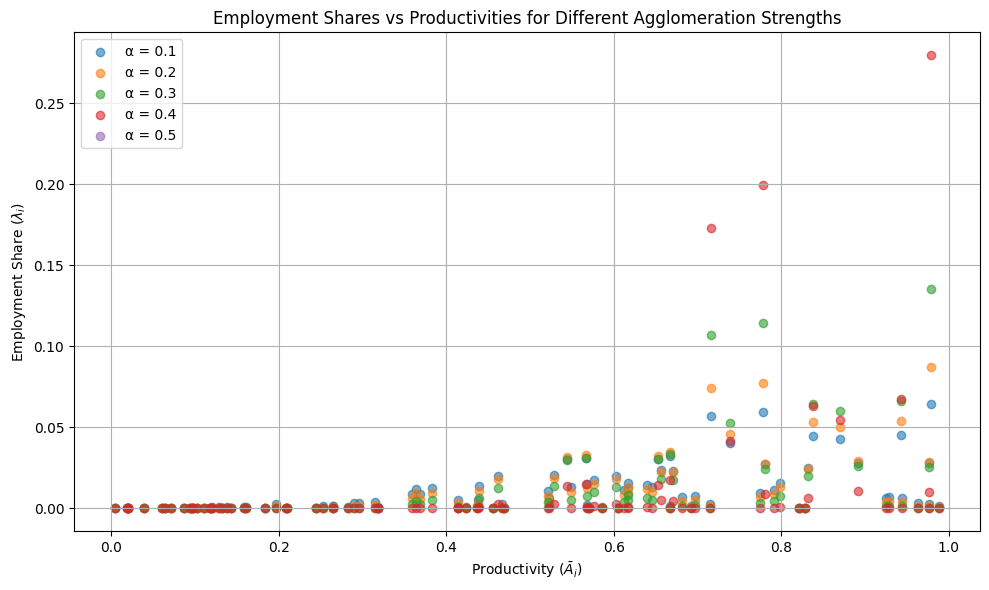

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
alphas = np.arange(0.1, 0.6, 0.1)  # α = 0.1, 0.2, ..., 0.5
beta = 0.5
N = 100  # Number of regions
L_total = 1.0  # Total population

# Generate random productivities and amenities
np.random.seed(0)
A_bar = np.random.uniform(0, 1, N)
U_bar = np.random.uniform(0, 1, N)

# Store results for plotting
results = {}

for alpha in alphas:
    try:
        exponent = 1 / (beta - alpha)
        numerator = (A_bar * U_bar) ** exponent
        denominator = np.sum(numerator)
        lambda_i = numerator / denominator
        results[alpha] = {
            'A_bar': A_bar,
            'lambda': lambda_i
        }
    except ZeroDivisionError:
        print(f"Skipped α = {alpha} due to division by zero.")

# Plot employment shares vs productivities
plt.figure(figsize=(10, 6))
for alpha in results:
    plt.scatter(results[alpha]['A_bar'], results[alpha]['lambda'], label=f'α = {alpha:.1f}', alpha=0.6)

plt.xlabel('Productivity ($\\bar{A}_i$)')
plt.ylabel('Employment Share ($\\lambda_i$)')
plt.title('Employment Shares vs Productivities for Different Agglomeration Strengths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


When $\alpha$ is low (e.g., 0.1), employment shares are more evenly spread across regions and closely reflect fundamental productivities ($\bar{A}_i$).
As $\alpha$ increases, we introduce stronger agglomeration effects, and employment becomes more concentrated in high-productivity regions. The curve gets steeper, showing more sensitivity to productivity differences.
At $\alpha = 0.5$, the denominator in the exponent $\frac{1}{\beta-\alpha}$ approaches zero, making the exponent explode/undefined. 


(d) Compute the model for $\beta = 0.1(0.1)0.5$. Graph employment shares against productivities for all these 5 equilibria. What do you see? What does this reveal about the role of congestion forces and misallocation?

Note: $\beta=0.1$ breaks the equilibrium. Distribution cannot be identified.

/var/folders/pt/pzlm77zj5_9731nvb9k8hmyr0000gn/T/ipykernel_76554/2962470032.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  exponent = 1 / (beta - alpha)
/var/folders/pt/pzlm77zj5_9731nvb9k8hmyr0000gn/T/ipykernel_76554/2962470032.py:24: RuntimeWarning: invalid value encountered in divide
  lambda_i = numerator / denominator


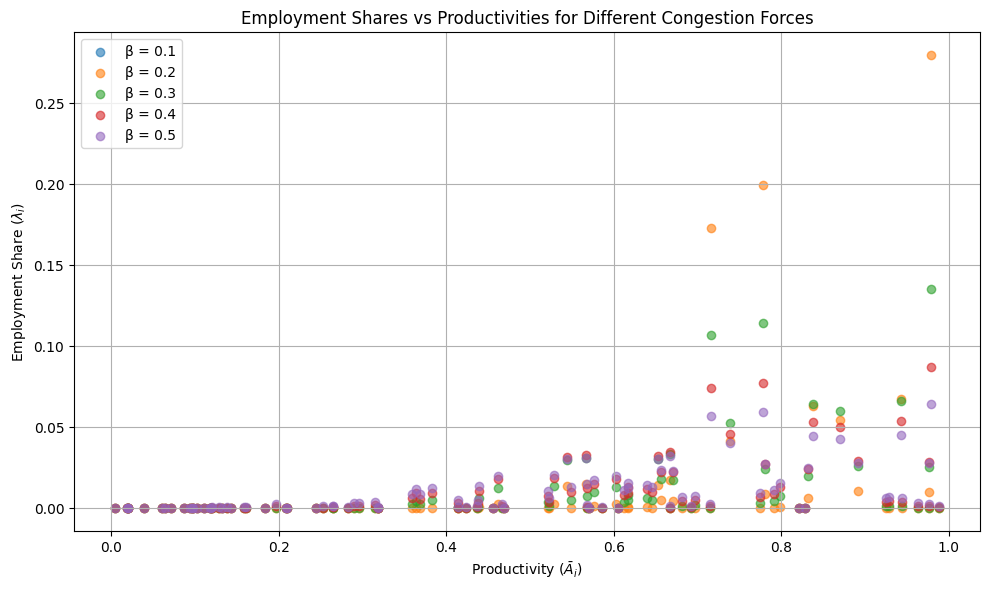

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
betas = np.arange(0.1, 0.6, 0.1)  # beta = 0.1, 0.2, ..., 0.5
alpha = 0.1
N = 100  # Number of regions
L_total = 1.0  # Total population

# Generate random productivities and amenities
np.random.seed(0)
A_bar = np.random.uniform(0, 1, N)
U_bar = np.random.uniform(0, 1, N)

# Store results for plotting
results = {}

for beta in betas:
    try:
        exponent = 1 / (beta - alpha)
        numerator = (A_bar * U_bar) ** exponent
        denominator = np.sum(numerator)
        lambda_i = numerator / denominator
        results[beta] = {
            'A_bar': A_bar,
            'lambda': lambda_i
        }
    except ZeroDivisionError:
        print(f"Skipped β = {beta} due to division by zero.")

# Plot employment shares vs productivities
plt.figure(figsize=(10, 6))
for beta in results:
    plt.scatter(results[beta]['A_bar'], results[beta]['lambda'], label=f'β = {beta:.1f}', alpha=0.6)

plt.xlabel('Productivity ($\\bar{A}_i$)')
plt.ylabel('Employment Share ($\\lambda_i$)')
plt.title('Employment Shares vs Productivities for Different Congestion Forces')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


When $\beta$ is low (e.g., 0.2), employment shares are more concentrated in regions with high $\bar{A}_i$.
As $\beta$ increases, we introduce stronger congestion effect, meaning when population increases amenities decrease at a faster rate. This implies that employment becomes less concentrated across regions, or more spread.  
At $\beta = 0.1=\alpha$, the denominator in the exponent $\frac{1}{\beta-\alpha}$ approaches zero, making the exponent explode/undefined. 

(e) Write down and code up the model in changes. Relative to your intial equilibrium compute the effects on wages and employment in each region of a $10\%$ increase in productivity in location 1. Graph changes in population against location productivity

_Solution_: The change in population (1) and change in wage distributions (2) fully characterizes the equilibrium 

[ _I thought it was in log in changes_ $d (\ln x)$: $\hat{x}=\frac{dx}{x}$ 
_but it is in changes meaning_ $\hat{x}=\frac{x^{\text{new}}}{x^{old}}$ ]

 (1.e)  $\hat{\lambda}_i = \frac{(\hat{\bar{A}}_i \hat{\bar{U}}_i)^{\frac{1}{\beta - \alpha}}}{\sum_i \lambda_i (\hat{\bar{A}}_i \hat{\bar{U}}_i)^{\frac{1}{\beta - \alpha}}}$

 (2.e)  $\hat{w}_i = \hat{A}_i$

To solve for the impact of population shares and wages to a $10\%$ increase in
productivity in location 1, we plug in $\hat{\bar{A}}_1=1.1$, $\hat{\bar{A}}_i=1 \; \forall i\not=1$, $\hat{\bar{U}}_i=1 \; \forall i$ + data from part (a) on $\lambda_i$.

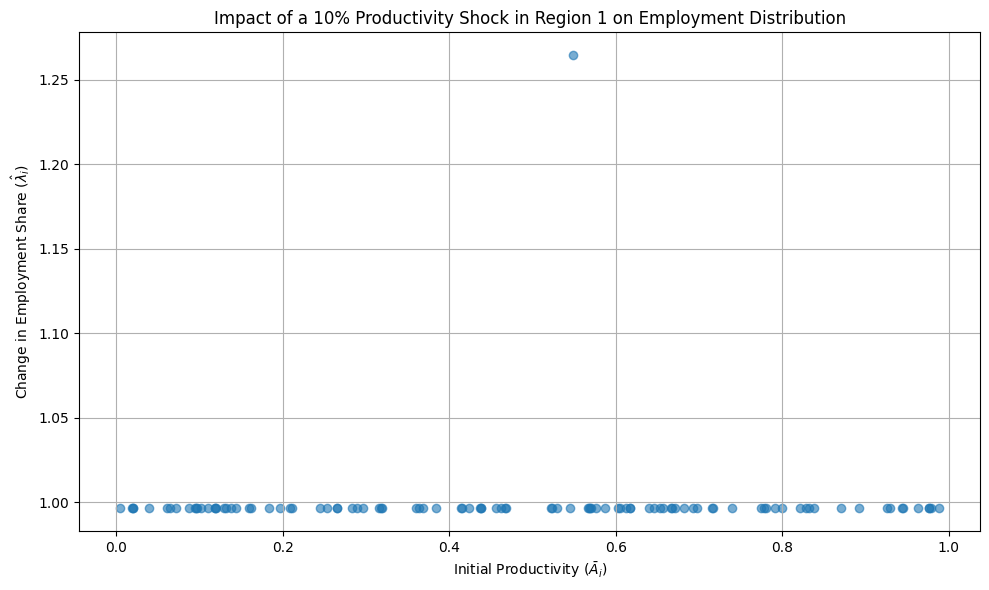

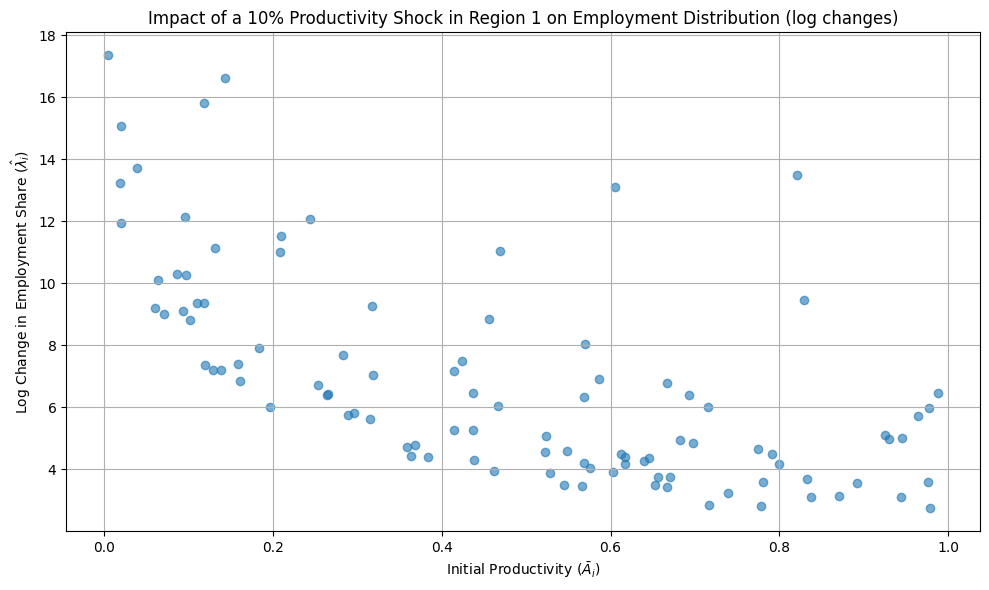

In [47]:
import numpy as np
import pandas as pd

# Parameters
alpha = 0.1
beta = 0.5
N = 100  # Number of regions
L_total = 1.0  # Total population

# Generate random productivities and amenities
np.random.seed(0)
A_bar = np.random.uniform(0, 1, N)
U_bar = np.random.uniform(0, 1, N)

# Initial equilibrium (same as part (a) above)
exponent = 1 / (beta - alpha)
numerator = (A_bar * U_bar) ** exponent
denominator = np.sum(numerator)
lambda_initial = numerator / denominator
wage_initial = A_bar * lambda_initial  ** (alpha ) 

# Apply a 10% productivity increase in region 1 (index 0)
A_hat = np.ones(N)
A_hat[0] = 1.1  # 10% increase in productivity
U_hat = np.ones(N)  # no change in amenities

# Compute change in lambda_i using Equation (1.e)
hat_term = (A_hat * U_hat) ** exponent
lambda_hat = hat_term / np.sum(lambda_initial * hat_term)

# Compute change in wage directly from changes in productivity
wage_hat =  A_bar * lambda_hat  ** (alpha ) 


# Step 5: Store results in a DataFrame
df_changes = pd.DataFrame({
    'Region': np.arange(1, N+1),
    'A_bar': A_bar,
    'lambda_initial': lambda_initial,
    'lambda_hat': lambda_hat,
    'wage_initial': wage_initial,
    'wage_hat': wage_hat,
    'change_in_lambda': lambda_hat - lambda_initial,
    'log_change_in_lambda': np.log(lambda_hat / lambda_initial),
    'log_change_in_wage': np.log(wage_hat / wage_initial)
})




# Plot: Change in population share vs initial productivity
plt.figure(figsize=(10, 6))
plt.scatter(df_changes['A_bar'], df_changes['lambda_hat'], alpha=0.6)
plt.xlabel('Initial Productivity ($\\bar{A}_i$)')
plt.ylabel('Change in Employment Share ($\\hat{\\lambda}_i$)')
plt.title('Impact of a 10% Productivity Shock in Region 1 on Employment Distribution')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: log change in population share vs initial productivity
plt.figure(figsize=(10, 6))
plt.scatter(df_changes['A_bar'], df_changes['log_change_in_lambda'], alpha=0.6)
plt.xlabel('Initial Productivity ($\\bar{A}_i$)')
plt.ylabel('Log Change in Employment Share ($\\hat{\\lambda}_i$)')
plt.title('Impact of a 10% Productivity Shock in Region 1 on Employment Distribution (log changes)')
plt.grid(True)
plt.tight_layout()
plt.show()